In [269]:
# Imports
import os
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [270]:
# Load dataset
data = pd.read_csv("../data/02_engineered_data.csv")

In [271]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16048 entries, 0 to 16047
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   WEIGHT                      16048 non-null  float64
 1   GENDER                      16048 non-null  object 
 2   NUMBER_OF_CHILDREN          16048 non-null  int64  
 3   AGE                         16048 non-null  int64  
 4   HOUSEHOLD_SIZE              16048 non-null  int64  
 5   TV_TOTAL                    16048 non-null  float64
 6   FLYERS                      16048 non-null  float64
 7   PRINT_TOTAL                 16048 non-null  float64
 8   ONLINE_VIDEO                16048 non-null  float64
 9   ONLINE_DISPLAY              16048 non-null  float64
 10  ONLINE_TOTAL                16048 non-null  float64
 11  TIKTOK                      16048 non-null  float64
 12  YOUTUBE_TOTAL               16048 non-null  float64
 13  YOUTUBE_MOBILE              160

In [272]:
# Prettyer plots
# Set global Seaborn style
sns.set(style="whitegrid")

# Customize the default appearance of all plots
# sns.set_context("talk")  # Make the context a bit larger for presentations
# sns.set_palette("Reds")  # Set a light orange color palette

# Customize Matplotlib settings globally
plt.rcParams.update({
    'axes.titleweight': 'bold',  # Bold title
    # 'axes.labelsize': 14,        # Larger axis labels
    # 'axes.titlesize': 16,        # Larger title
    # 'xtick.labelsize': 12,       # Larger x-tick labels
    # 'ytick.labelsize': 12,       # Larger y-tick labels
    'grid.alpha': 0.7,           # Slightly transparent grid lines
    'grid.linestyle': '--',      # Dashed grid lines
    'grid.color': 'gray',        # Gray grid lines
    # 'figure.figsize': (10, 6),   # Larger figure size
    'axes.facecolor': 'white',   # White background for axes
    'axes.grid': True,           # Enable grid by default
})

# EDA



## Population overview

In [273]:
total_population = data["WEIGHT"].sum()
print(f"Total population -> {total_population:,.0f}")

Total population -> 82,247,925


## Purchase Rate

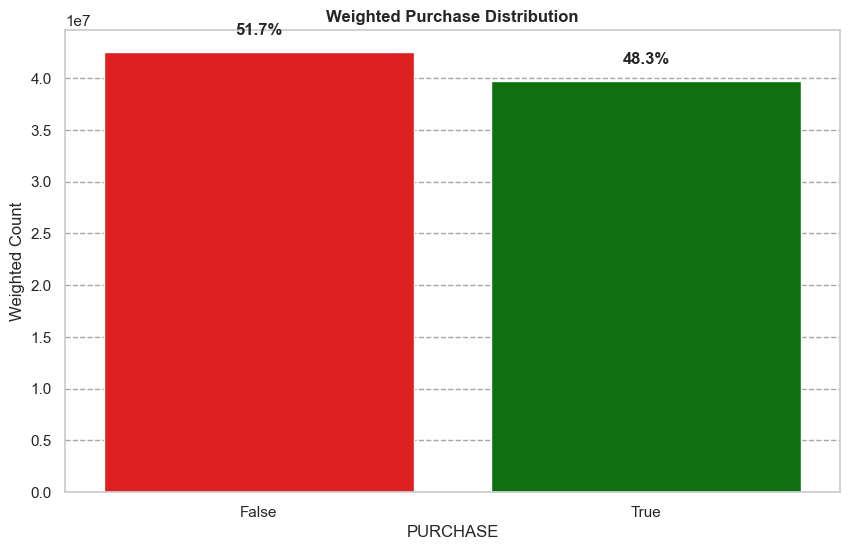

In [274]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute weighted counts for each class
weighted_counts = data.groupby("PURCHASE")["WEIGHT"].sum().reset_index()

# Compute percentages
total_weight = weighted_counts["WEIGHT"].sum()
weighted_counts["PERCENT"] = (weighted_counts["WEIGHT"] / total_weight) * 100  # Convert to percentage

# Bar colors
red_green = {0: "red", 1: "green"}

# Plot
ax = sns.barplot(x="PURCHASE", y="WEIGHT", data=weighted_counts, hue="PURCHASE", palette=red_green, legend=False)

# Add percentage labels on top of bars
for i, row in weighted_counts.iterrows():
    ax.text(row["PURCHASE"], row["WEIGHT"] + total_weight * 0.02, f"{row['PERCENT']:.1f}%", 
            ha='center', fontsize=12, fontweight='bold')

plt.title("Weighted Purchase Distribution")
plt.xlabel("PURCHASE")
plt.ylabel("Weighted Count")
plt.show()


In [275]:
# Listing Numerical columns
cols = data.columns
num_cols = list(data.select_dtypes('number'))

print(f"Number of numerical columns: {len(num_cols)}")
print(num_cols)

Number of numerical columns: 25
['WEIGHT', 'NUMBER_OF_CHILDREN', 'AGE', 'HOUSEHOLD_SIZE', 'TV_TOTAL', 'FLYERS', 'PRINT_TOTAL', 'ONLINE_VIDEO', 'ONLINE_DISPLAY', 'ONLINE_TOTAL', 'TIKTOK', 'YOUTUBE_TOTAL', 'YOUTUBE_MOBILE', 'YOUTUBE_DESKTOP', 'YOUTUBE_TABLET', 'YOUTUBE_CTV', 'PINTEREST', 'OUTLIER_SCORE', 'TOTAL_MEDIA_EXPOSURE', 'DIGITAL_MEDIA_TOTAL', 'TRADITIONAL_MEDIA_TOTAL', 'SOCIAL_MEDIA_TOTAL', 'VIDEO_MEDIA_TOTAL', 'MEDIA_PER_HOUSEHOLD_MEMBER', 'MEDIA_PER_CHILD']


In [276]:
# Listing Categorical columns
cat_cols = list(set(cols) - set(num_cols))

print(f"Number of categorical columns: {len(cat_cols)}")
print(cat_cols)

Number of categorical columns: 6
['GENDER', 'AGE_GROUP', 'PURCHASE', 'ENGAGED_VIDEO_USER', 'TARGET_GROUP', 'HEAVY_MEDIA_USER']


In [277]:
# Separating the numeric and categorical columns as each will require a separate approach
df_numeric = data[num_cols]
df_categorical = data[cat_cols]

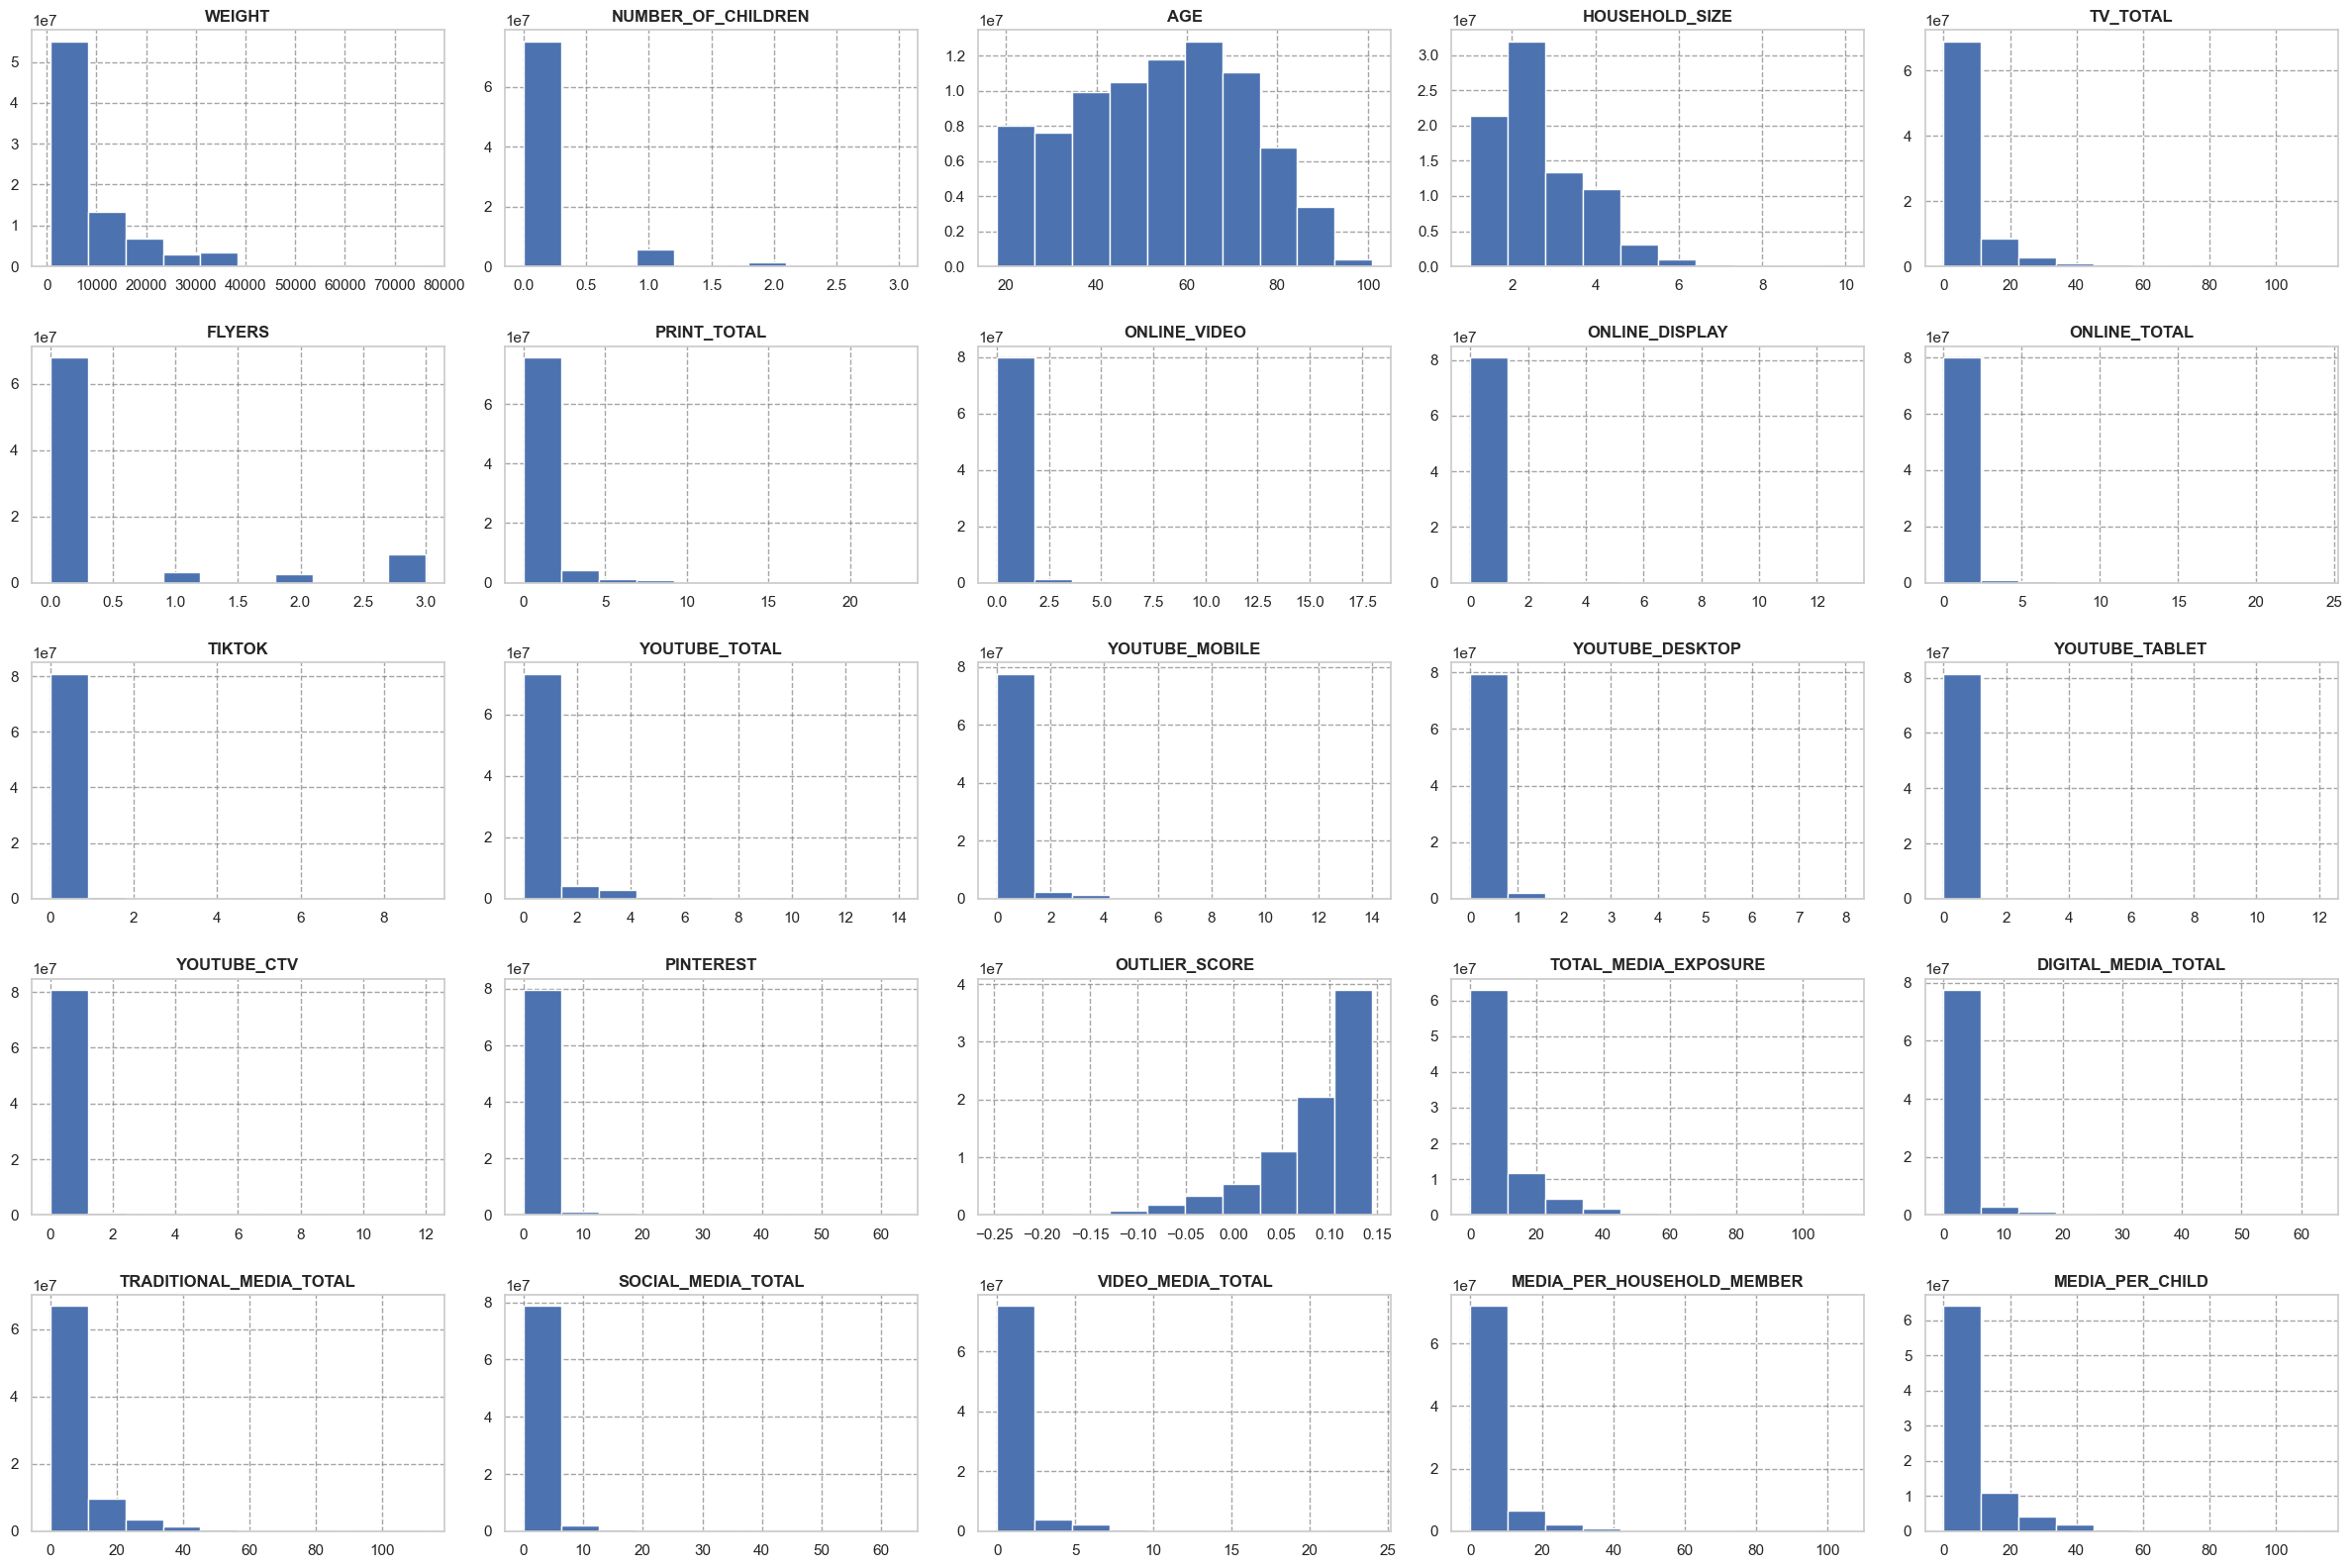

In [278]:
# Creating a grid of subplots for the numeric columns
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(24, 16))
axes = axes.flatten()  # Flatten 2D array to 1D

# Plot each weighted histogram in a subplot
for i, col in enumerate(df_numeric.columns):
    plt.sca(axes[i])
    plt.hist(df_numeric[col], weights=data["WEIGHT"])  # Apply sample weights
    plt.title(col)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


- All media features are heavily skewed towards the extreme low end of the distribution which indicates that exposure to the campaign was quite low
- Age distribution favors older people

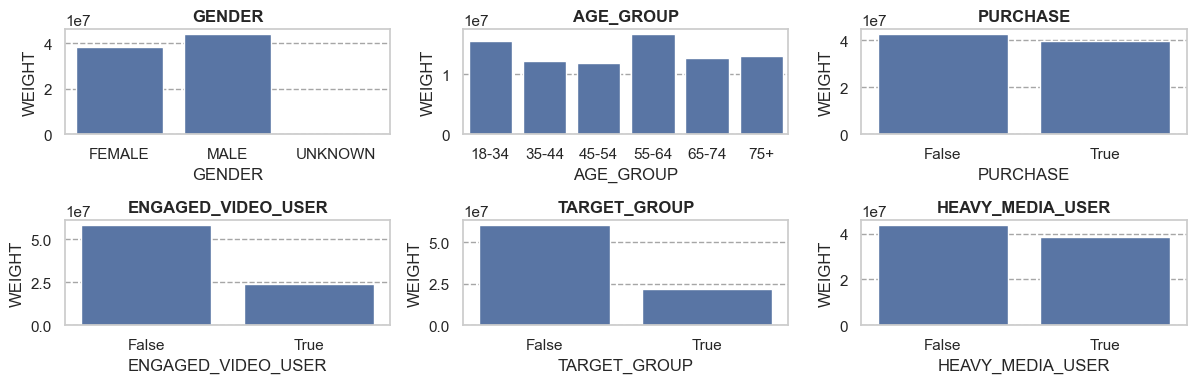

In [279]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 4))
axes = axes.flatten()

# Plot each weighted barplot in a subplot
for i, col in enumerate(df_categorical.columns):
    weighted_counts = data.groupby(col)["WEIGHT"].sum().reset_index()  # Sum weights for each category
    sns.barplot(x=col, y="WEIGHT", data=weighted_counts, ax=axes[i])
    axes[i].set_title(col)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


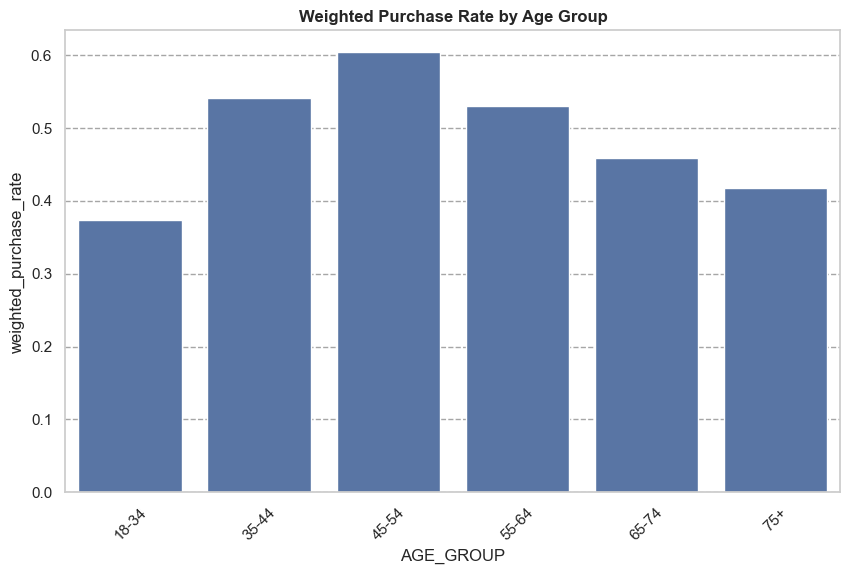

In [280]:
# Group by age group and calculate weighted purchase rate
weighted_purchase_rate_by_age_group = data.groupby('AGE_GROUP').apply(
    lambda x: np.average(x['PURCHASE'], weights=x['WEIGHT']), include_groups=False
).reset_index(name='weighted_purchase_rate')

# Plot the weighted purchase rate by age group
age_group_order = ['18-34', '35-44', '45-54', '55-64', '65-74', '75+']
sns.barplot(x='AGE_GROUP', y='weighted_purchase_rate', data=weighted_purchase_rate_by_age_group, order=age_group_order)

# Add title and labels
plt.title("Weighted Purchase Rate by Age Group")
plt.xticks(rotation=45)
plt.show()


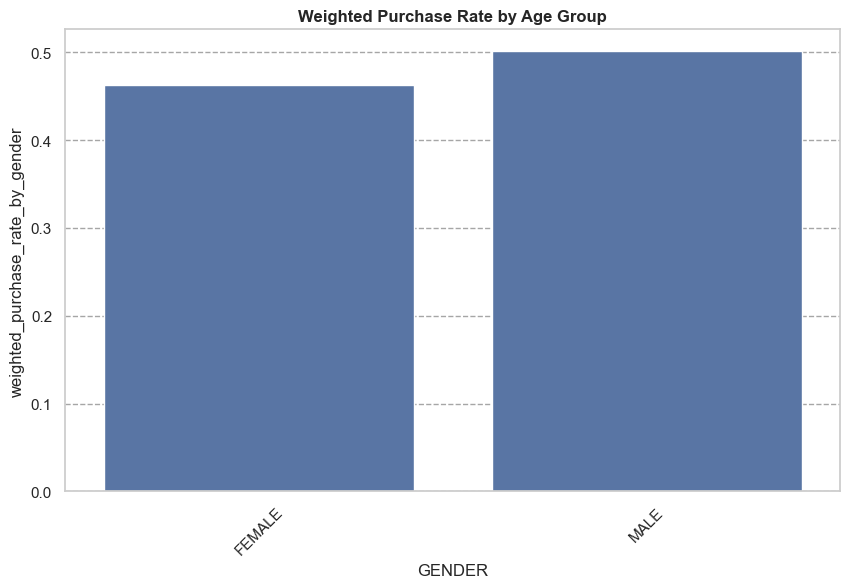

In [281]:
# Filter the data to exclude 'Unknown' gender category as there are only 3 observations
filtered_data = data[data['GENDER'] != 'UNKNOWN']

# Group by gender and calculate weighted purchase rate
weighted_purchase_rate_by_gender = filtered_data.groupby('GENDER').apply(
    lambda x: np.average(x['PURCHASE'], weights=x['WEIGHT']), include_groups=False
).reset_index(name='weighted_purchase_rate_by_gender')

# Plot the weighted purchase rate by gender
sns.barplot(x='GENDER', y='weighted_purchase_rate_by_gender', data=weighted_purchase_rate_by_gender)

# Add title and labels
plt.title("Weighted Purchase Rate by Age Group")
plt.xticks(rotation=45)
plt.show()


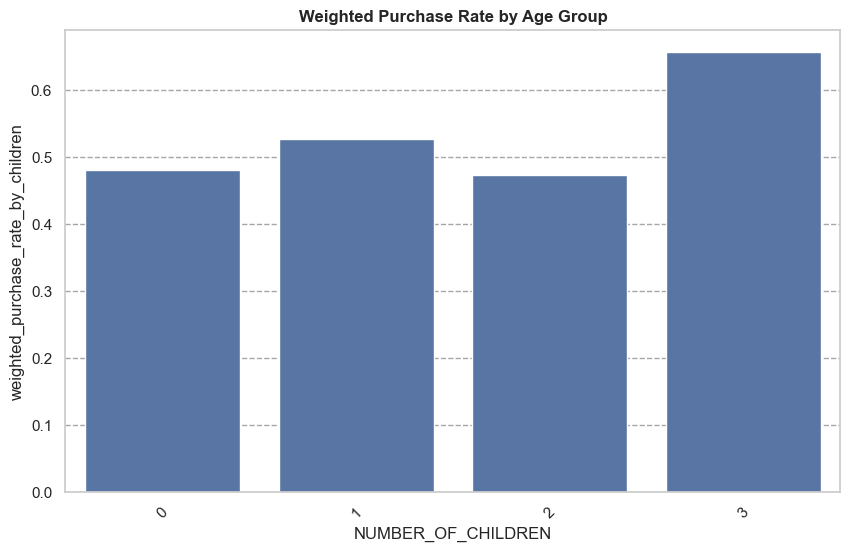

In [282]:
# Group by gender and calculate weighted purchase rate
weighted_purchase_rate_by_children = filtered_data.groupby('NUMBER_OF_CHILDREN').apply(
    lambda x: np.average(x['PURCHASE'], weights=x['WEIGHT']), include_groups=False
).reset_index(name='weighted_purchase_rate_by_children')

# Plot the weighted purchase rate by gender
sns.barplot(x='NUMBER_OF_CHILDREN', y='weighted_purchase_rate_by_children', data=weighted_purchase_rate_by_children)

# Add title and labels
plt.title("Weighted Purchase Rate by Age Group")
plt.xticks(rotation=45)
plt.show()


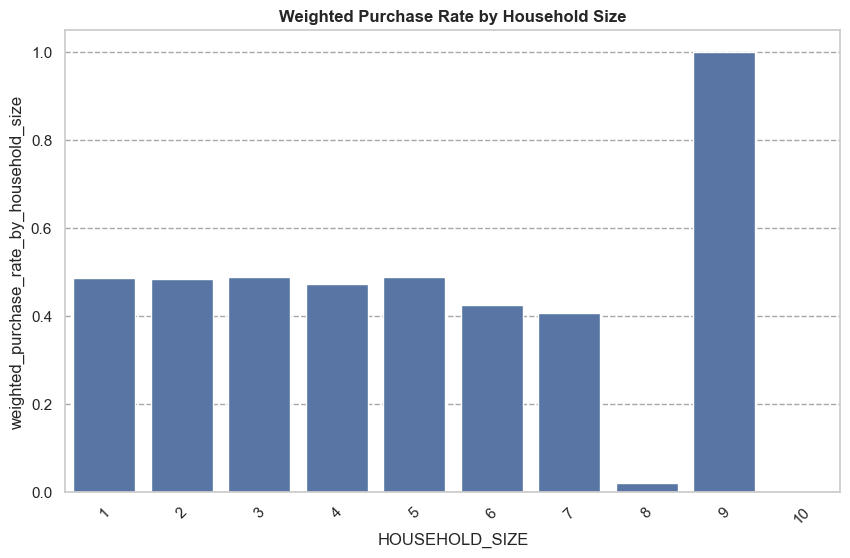

In [283]:
# Group by gender and calculate weighted purchase rate
weighted_purchase_rate_by_household_size = filtered_data.groupby('HOUSEHOLD_SIZE').apply(
    lambda x: np.average(x['PURCHASE'], weights=x['WEIGHT']), include_groups=False
).reset_index(name='weighted_purchase_rate_by_household_size')

# Plot the weighted purchase rate by gender
sns.barplot(x='HOUSEHOLD_SIZE', y='weighted_purchase_rate_by_household_size', data=weighted_purchase_rate_by_household_size)

# Add title and labels
plt.title("Weighted Purchase Rate by Household Size")
plt.xticks(rotation=45)
plt.show()


In [284]:
data["HOUSEHOLD_SIZE"].value_counts(dropna=False)

HOUSEHOLD_SIZE
2     6935
1     4979
3     2041
4     1546
5      426
6       92
7       25
8        2
10       1
9        1
Name: count, dtype: int64

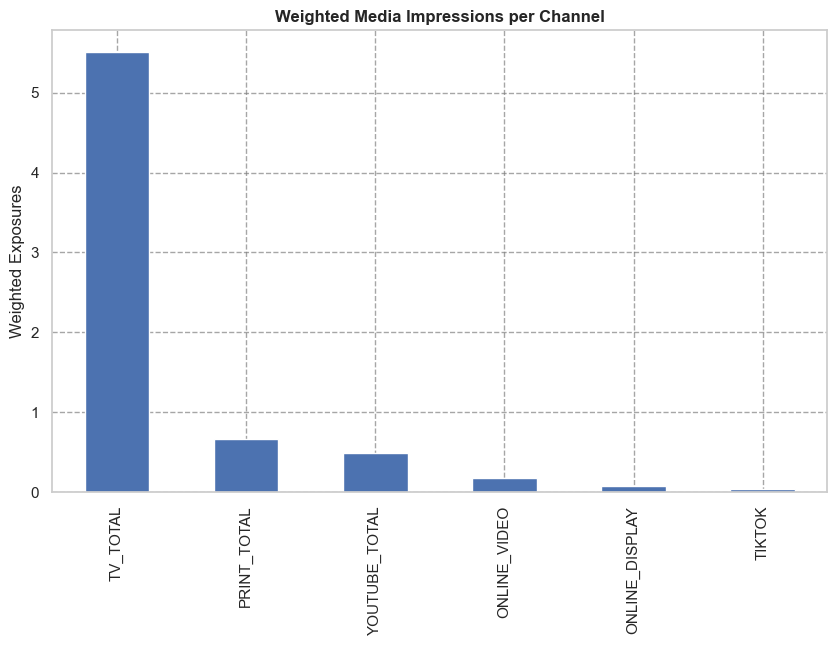

In [285]:
# List of media channels
media_channels = ['TV_TOTAL', 'PRINT_TOTAL', 'ONLINE_VIDEO', 'ONLINE_DISPLAY', 'YOUTUBE_TOTAL', 'TIKTOK']

# Calculate the weighted exposure per channel
weighted_channel_exposure = data[media_channels].apply(
    lambda x: np.average(x, weights=data['WEIGHT'])
).sort_values(ascending=False)

# Plot the weighted media exposure
weighted_channel_exposure.plot(kind='bar')
plt.title("Weighted Media Impressions per Channel")
plt.ylabel("Weighted Exposures")
plt.show()


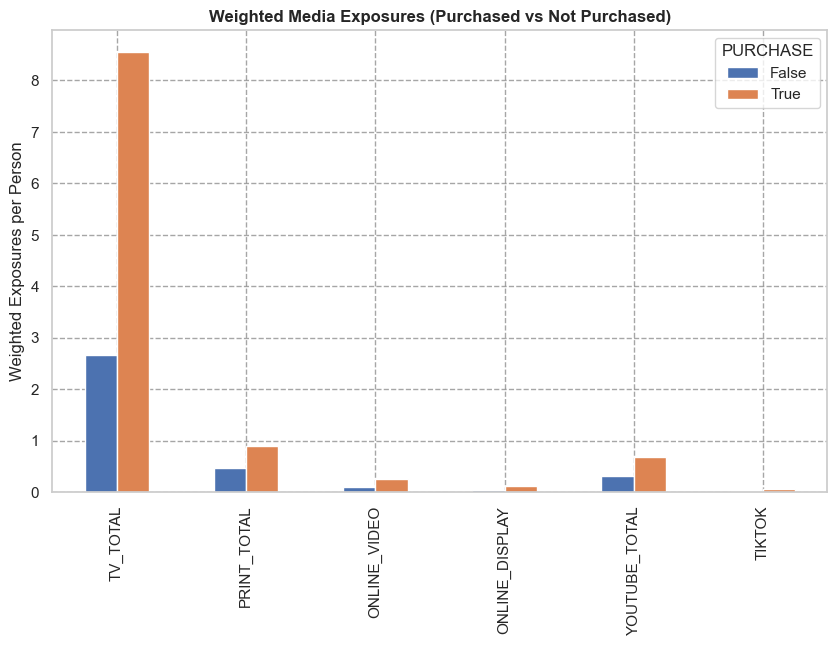

In [286]:
# Calculate weighted average exposure for purchasers vs non-purchasers
purchase_by_channel_weighted = data.groupby('PURCHASE').apply(
    lambda x: x[media_channels].apply(lambda col: np.average(col, weights=x['WEIGHT'])), include_groups=False).T

# Plot the weighted media exposure
purchase_by_channel_weighted.plot(kind='bar')
plt.title("Weighted Media Exposures (Purchased vs Not Purchased)")
plt.ylabel("Weighted Exposures per Person")
plt.show()


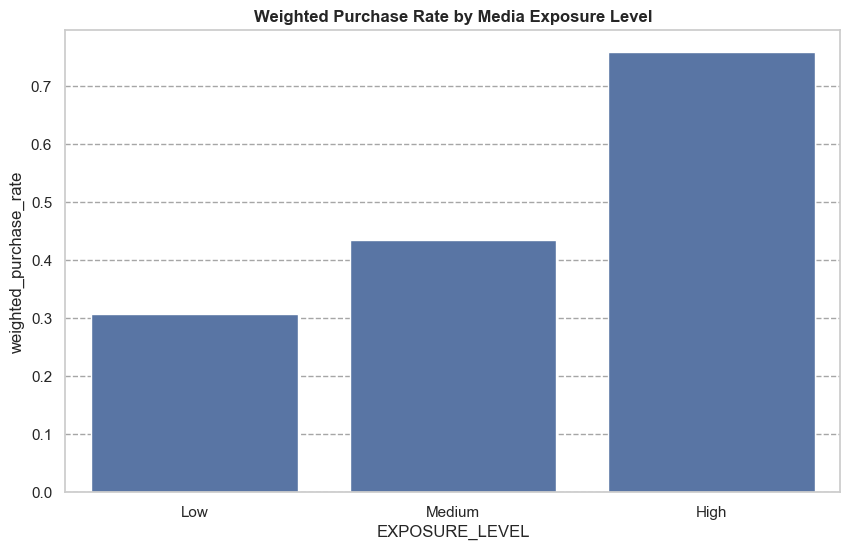

In [287]:
# Bin people into Low, Medium, and High media exposure
data['EXPOSURE_LEVEL'] = pd.qcut(data['TOTAL_MEDIA_EXPOSURE'], q=3, labels=['Low', 'Medium', 'High'])

# Calculate weighted purchase rate by exposure level, excluding the 'EXPOSURE_LEVEL' column from the group
weighted_purchase_rate_by_exposure = data.groupby('EXPOSURE_LEVEL', observed=True).apply(
    lambda x: np.average(x['PURCHASE'], weights=x['WEIGHT']), include_groups=False
).reset_index(name='weighted_purchase_rate')

# Plot the weighted purchase rate by media exposure level
sns.barplot(x='EXPOSURE_LEVEL', y='weighted_purchase_rate', data=weighted_purchase_rate_by_exposure)
plt.title("Weighted Purchase Rate by Media Exposure Level")
plt.show()


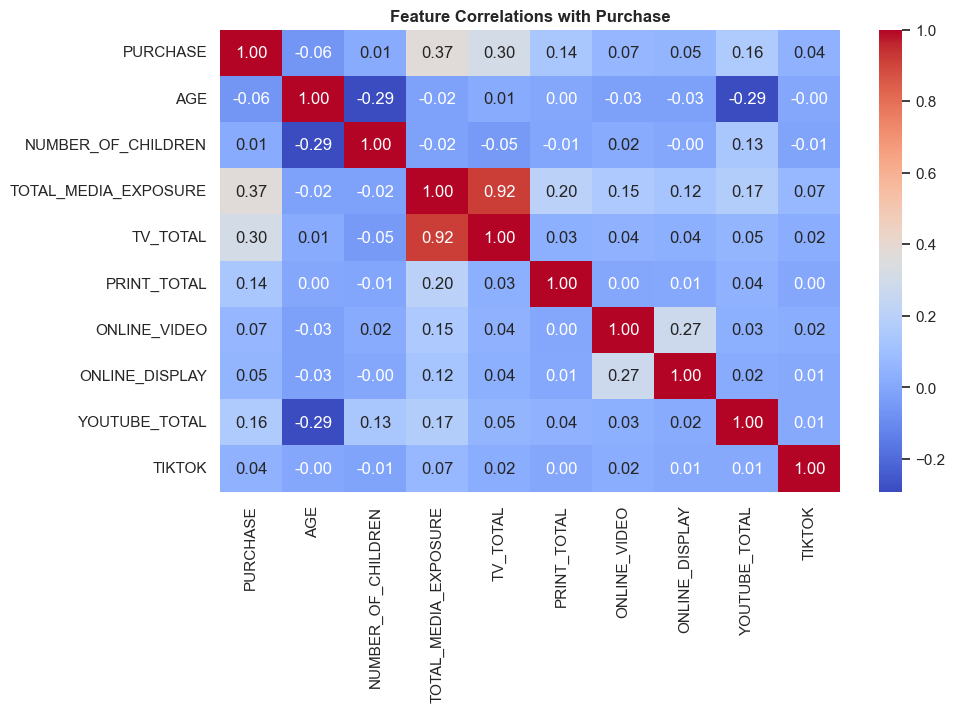

In [288]:
corr = data[['PURCHASE', 'AGE', 'NUMBER_OF_CHILDREN', 'TOTAL_MEDIA_EXPOSURE'] + media_channels].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlations with Purchase")
plt.show()

In [289]:
purchase_rate_by_age = data.groupby("AGE")["PURCHASE"].mean()
purchase_rate_by_gender = data.groupby("GENDER")["PURCHASE"].mean()
purchase_rate_by_household = data.groupby("HOUSEHOLD_SIZE")["PURCHASE"].mean()

In [290]:
purchase_rate_by_age

AGE
18     0.130435
19     0.071429
20     0.341463
21     0.288889
22     0.229167
         ...   
97     0.500000
98     0.333333
99     0.000000
100    0.000000
101    0.000000
Name: PURCHASE, Length: 84, dtype: float64

In [291]:
purchase_rate_by_gender

GENDER
FEMALE     0.472025
MALE       0.517495
UNKNOWN    0.666667
Name: PURCHASE, dtype: float64

In [292]:
purchase_rate_by_household

HOUSEHOLD_SIZE
1     0.493874
2     0.483922
3     0.515924
4     0.515524
5     0.544601
6     0.500000
7     0.560000
8     0.500000
9     1.000000
10    0.000000
Name: PURCHASE, dtype: float64

In [293]:
# # Media Exposure by Age Group
# plt.figure(figsize=(10, 5))
# sns.barplot(x="AGE_GROUP", y="TOTAL_MEDIA_EXPOSURE", data=data, estimator=lambda x: np.average(x, weights=data.iloc[x.index, "WEIGHT"]))
# plt.title("Weighted Total Media Exposure by Age Group")
# plt.xlabel("Age Group")
# plt.ylabel("Total Media Exposure (Weighted)")
# plt.show()


In [294]:
# # Media Consumption by Channel Type
# plt.figure(figsize=(12, 6))
# channels = ["DIGITAL_MEDIA_TOTAL", "TRADITIONAL_MEDIA_TOTAL", "SOCIAL_MEDIA_TOTAL", "VIDEO_MEDIA_TOTAL"]

# data_melted = data.melt(id_vars=["AGE_GROUP", "WEIGHT"], value_vars=channels, var_name="Media Type", value_name="Exposure")

# sns.barplot(x="AGE_GROUP", y="Exposure", hue="Media Type", data=data_melted, estimator=lambda x: np.average(x, weights=data_melted.loc[x.index, "WEIGHT"]))
# plt.title("Weighted Media Exposure by Age Group and Channel Type")
# plt.xlabel("Age Group")
# plt.ylabel("Weighted Media Exposure")
# plt.legend(title="Media Type")
# plt.xticks(rotation=45)
# plt.show()


In [295]:
# plt.figure(figsize=(12, 6))
# channels = ["DIGITAL_MEDIA_TOTAL", "TRADITIONAL_MEDIA_TOTAL", "SOCIAL_MEDIA_TOTAL", "VIDEO_MEDIA_TOTAL"]

# # Melt the dataframe
# data_melted = data.melt(id_vars=["AGE_GROUP", "WEIGHT"], value_vars=channels, 
#                          var_name="Media Type", value_name="Exposure")

# # Define a proper estimator function
# def weighted_avg(values, weights):
#     return np.average(values, weights=weights)

# sns.barplot(
#     x="AGE_GROUP", 
#     y="Exposure", 
#     hue="Media Type", 
#     data=data_melted, 
#     estimator=lambda v: weighted_avg(v, data_melted.loc[v.index, "WEIGHT"])
# )

# plt.title("Weighted Media Exposure by Age Group and Channel Type")
# plt.xlabel("Age Group")
# plt.ylabel("Weighted Media Exposure")
# plt.legend(title="Media Type")
# plt.xticks(rotation=45)
# plt.show()


In [305]:
# # Set style for consistency
# sns.set(style="whitegrid")

# # --- 1. Age Groups and Impressions Across Channels ---
# plt.figure(figsize=(12, 6))
# sns.boxplot(x=data['AGE_GROUP'], y=data['TOTAL_MEDIA_EXPOSURE'])
# plt.title('Total Media Exposure Across Age Groups')
# plt.xticks(rotation=45)
# plt.show()

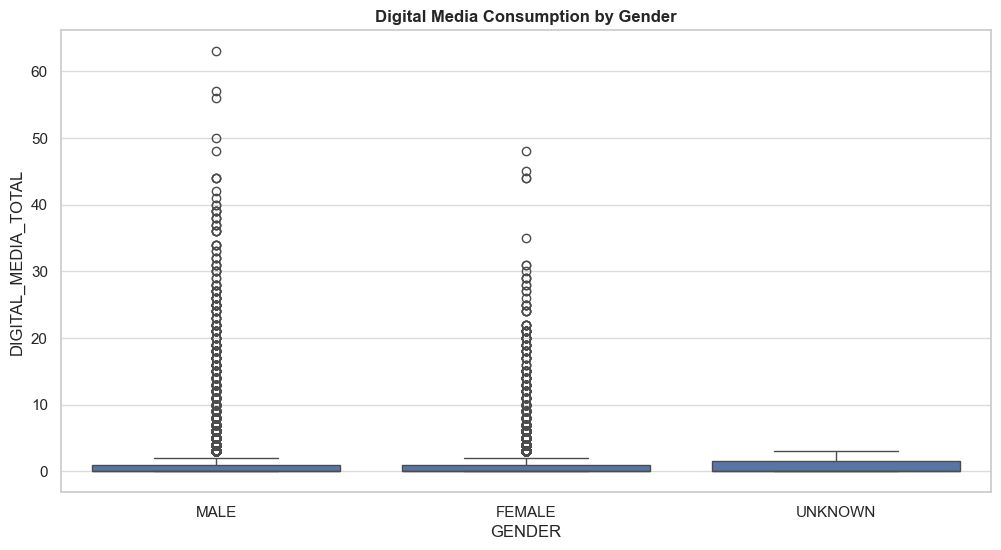

In [297]:
# --- 2. Media Consumption by Socio-Demographics ---
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['GENDER'], y=data['DIGITAL_MEDIA_TOTAL'])
plt.title('Digital Media Consumption by Gender')
plt.show()

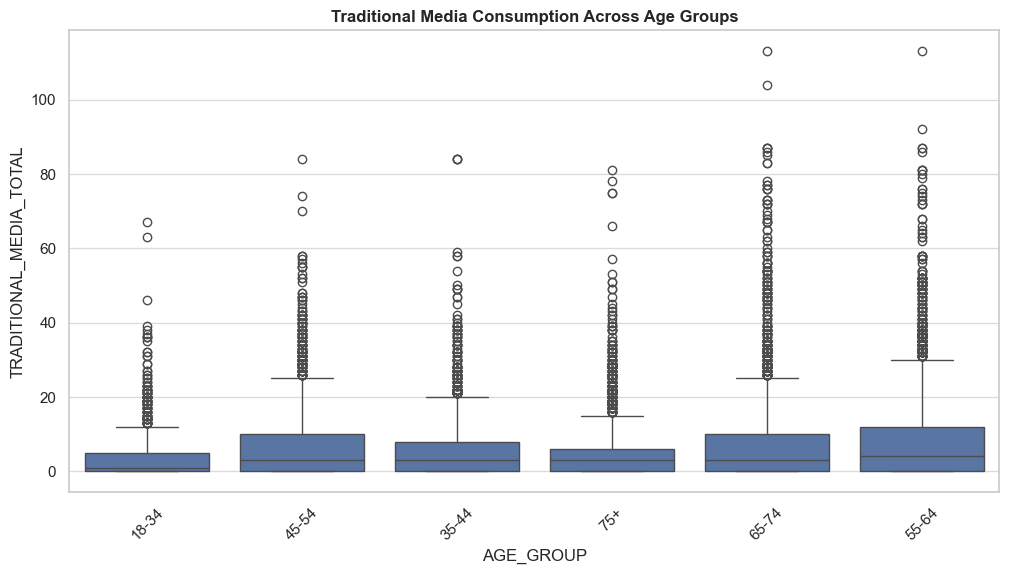

In [298]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['AGE_GROUP'], y=data['TRADITIONAL_MEDIA_TOTAL'])
plt.title('Traditional Media Consumption Across Age Groups')
plt.xticks(rotation=45)
plt.show()

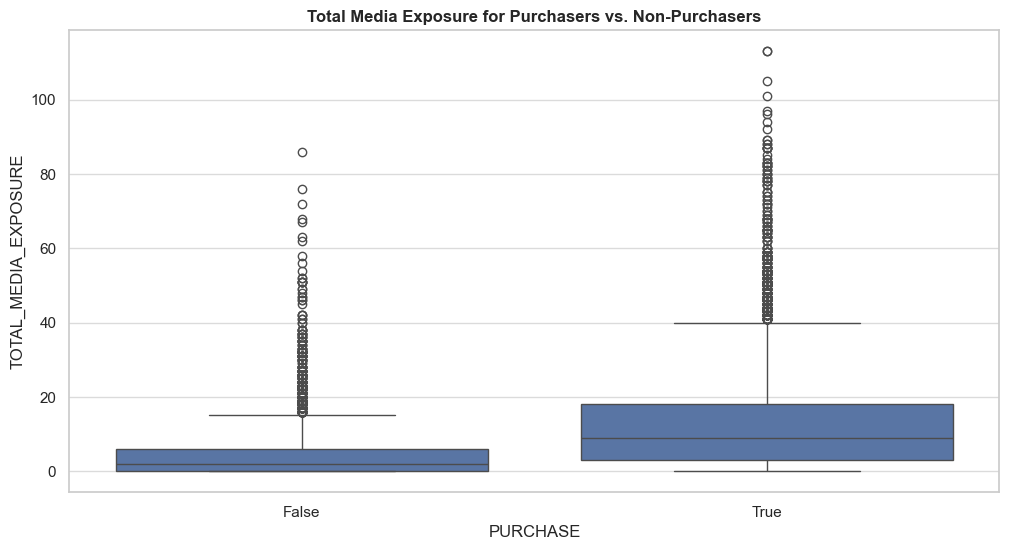

In [299]:
# --- 3. Media Channels Impact on Purchases ---
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['PURCHASE'], y=data['TOTAL_MEDIA_EXPOSURE'])
plt.title('Total Media Exposure for Purchasers vs. Non-Purchasers')
plt.show()

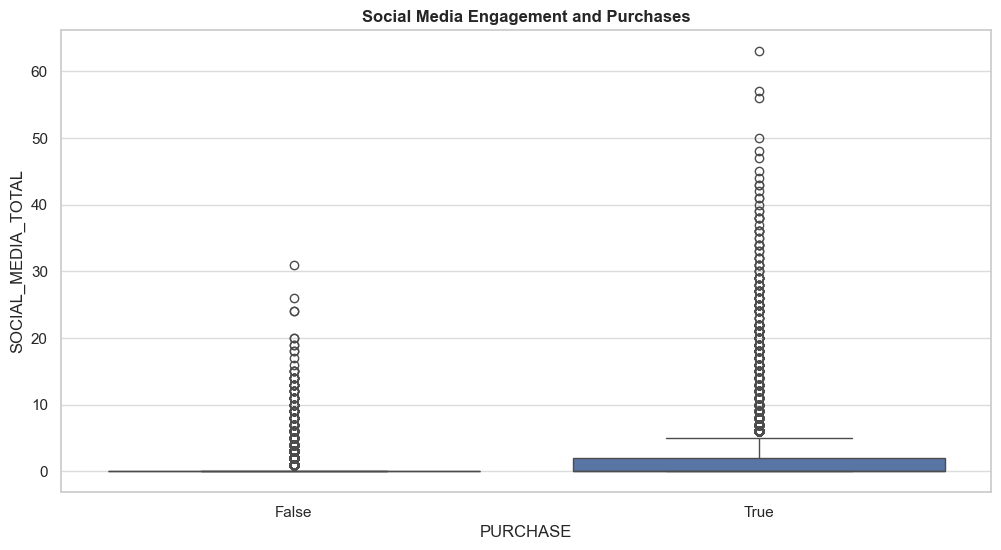

In [300]:
# --- 4. Social Media Impact ---
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['PURCHASE'], y=data['SOCIAL_MEDIA_TOTAL'])
plt.title('Social Media Engagement and Purchases')
plt.show()

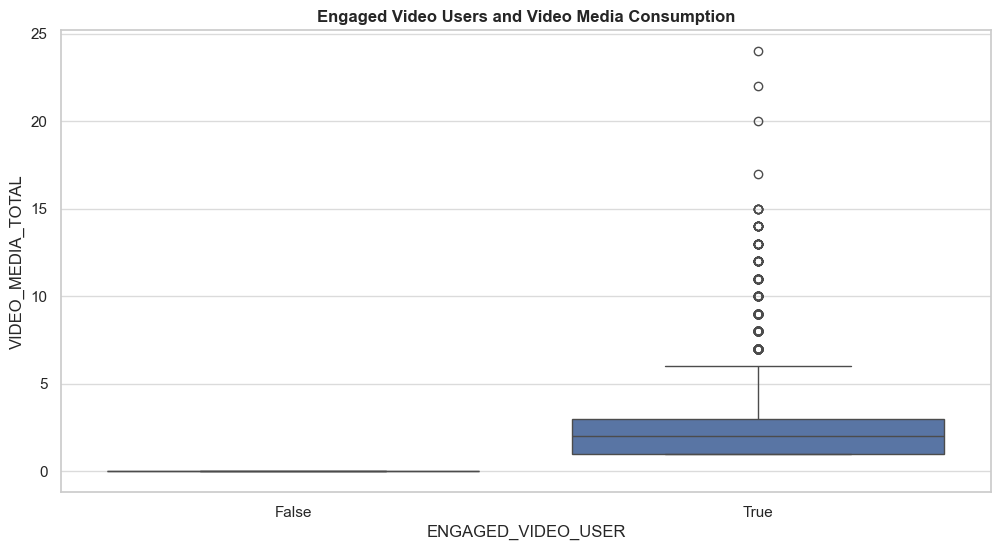

In [ ]:
# # --- 5. Video Media and Purchases ---
# plt.figure(figsize=(12, 6))
# sns.boxplot(x=data['ENGAGED_VIDEO_USER'], y=data['VIDEO_MEDIA_TOTAL'])
# plt.title('Engaged Video Users and Video Media Consumption')
# plt.show()

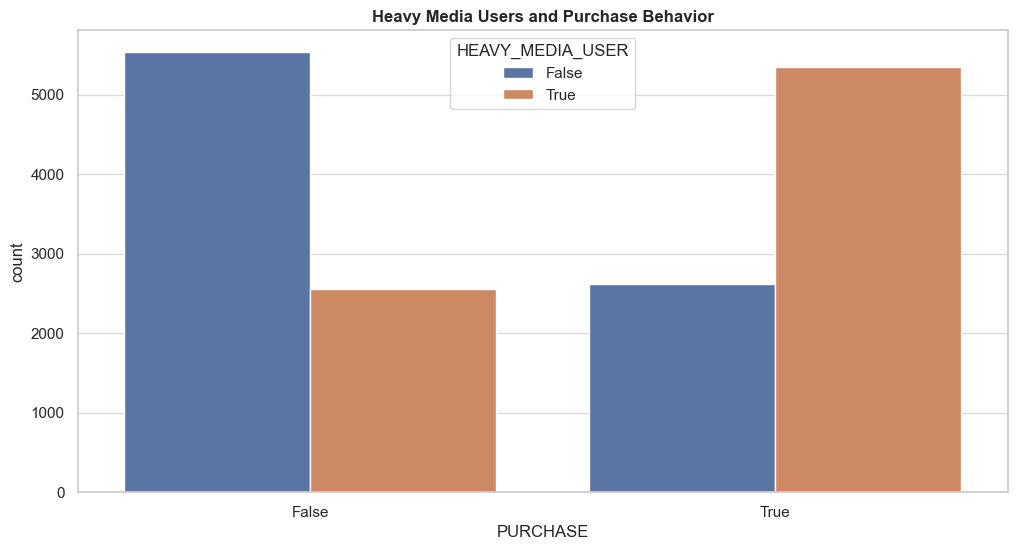

In [302]:
# --- 6. Heavy Media Users and Purchases ---
plt.figure(figsize=(12, 6))
sns.countplot(x='PURCHASE', hue='HEAVY_MEDIA_USER', data=data)
plt.title('Heavy Media Users and Purchase Behavior')
plt.show()

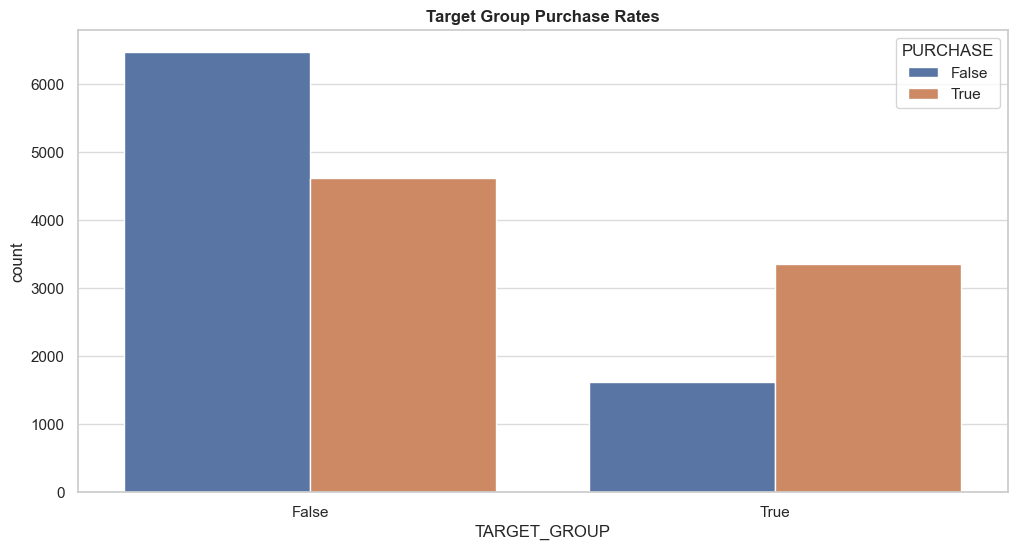

In [303]:
# --- 7. Target Group Breakdown ---
plt.figure(figsize=(12, 6))
sns.countplot(x='TARGET_GROUP', hue='PURCHASE', data=data)
plt.title('Target Group Purchase Rates')
plt.show()